In [2]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


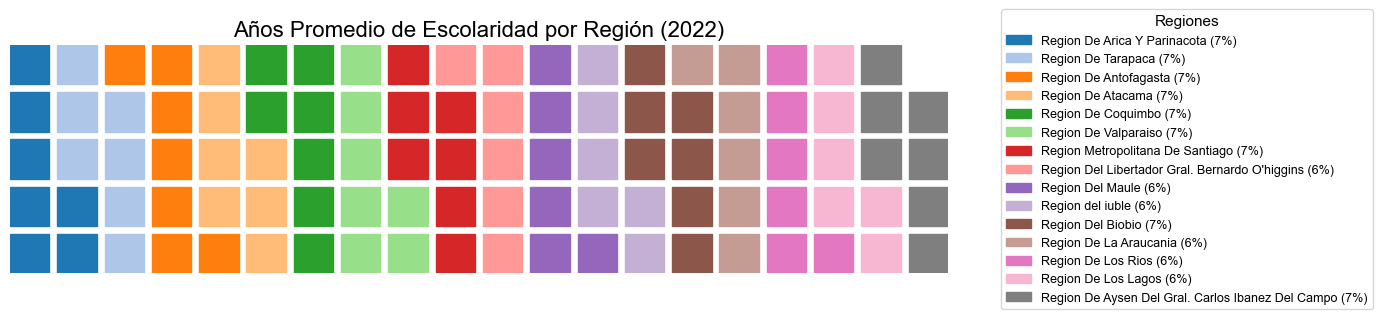

In [34]:
import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt
import unicodedata

df = pd.read_csv("AñosPromediosEscolaridad.csv", encoding="latin1", names=["territorio", "variable", "valor"], skiprows=1)
df = df[~df["territorio"].str.contains("Chile", case=False)]
df["territorio"] = (
    df["territorio"]
    .str.replace("Ã±", "ñ")
    .str.replace("Ã­", "í")
    .str.replace("Ã¡", "á")
    .str.replace("Ã³", "ó")
    .str.replace("Ã©", "é")
    .str.replace("Ãº", "ú")
    .str.replace("Ã", "í")
    .str.replace("Ó", "ó")
)
total = df["valor"].sum()
df["porcentaje"] = (df["valor"] / total * 100).round()
df["territorio"] = df["territorio"].apply(lambda x: unicodedata.normalize("NFKD", str(x)).encode("ascii", "ignore").decode("ascii"))
data_dict = dict(zip(df["territorio"], df["porcentaje"]))
base_colors = list(plt.cm.tab20.colors)
needed = len(data_dict)
colors = (base_colors * ((needed // len(base_colors)) + 1))[:needed]

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data_dict,
    figsize=(14, 12),
    colors=colors,
    title={
        'label': 'Años Promedio de Escolaridad por Región (2022)',
        'loc': 'center',
        'fontsize': 16
    },
    labels=[f"{k} ({int(v)}%)" for k, v in data_dict.items()],
    legend={
        'loc': 'center left',
        'bbox_to_anchor': (1.05, 0.5),
        'fontsize': 9,
        'title': 'Regiones',
        'title_fontsize': 11
    }
)

plt.tight_layout()
plt.show()
fig.savefig('wafles.png')
